# Loading Dataset

In [2]:
import tensorflow as tf

In [2]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

tf.Tensor(-655.45886, shape=(), dtype=float32)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.10.1


In [13]:
import tensorflow as tf

dataset_directory = r"D:\Virtual Environments\Pattern Recognition\raw dataset"
batch_size = 32
img_height = 256
img_width = 256

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dataset_directory,
    labels="inferred",
    label_mode="categorical",  # or "int" depending on your needs
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Optional: Inspect the dataset
class_names = dataset.class_names
print("Classes:", class_names)
for images, labels in dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)


Found 18160 files belonging to 10 classes.
Classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Image batch shape: (32, 256, 256, 3)
Label batch shape: (32, 10)


# Visualization Function

In [ ]:
import matplotlib.pyplot as plt
def visualize(original, updated):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Preprocessed image')
  plt.imshow(updated)

# Image Preprocessing

In [33]:
import os
import numpy as np
import cv2
from PIL import Image, ImageEnhance

# Visualization

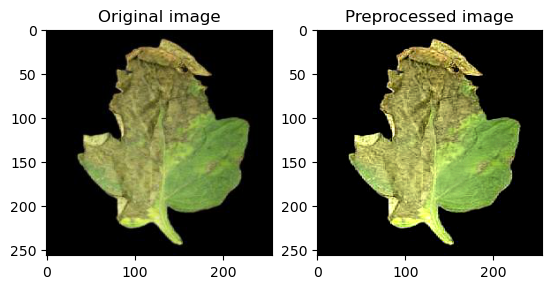

In [80]:
image = Image.open(r"D:\Virtual Environments\Pattern Recognition\raw dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot90.jpg").convert('RGB')
image_np = np.array(image)
            
# Convert from RGB to BGR for OpenCV denoising
image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
            
# Apply denoising using fastNlMeansDenoisingColored
denoised_bgr = cv2.fastNlMeansDenoisingColored(image_bgr, 
                                                None, 
                                                h=2, 
                                                hColor=2, 
                                                templateWindowSize=17, 
                                                searchWindowSize=21)
 # Convert back to RGB
denoised_rgb = cv2.cvtColor(denoised_bgr, cv2.COLOR_BGR2RGB)
            
# Normalize the image (min-max normalization)
norm_img = (denoised_rgb - denoised_rgb.min()) / (denoised_rgb.max() - denoised_rgb.min()) * 255.0
norm_img = norm_img.astype(np.uint8)
processed_image = Image.fromarray(norm_img)
            
# Enhance image sharpness to improve details
sharpness_controller = ImageEnhance.Sharpness(processed_image)
processed_image = sharpness_controller.enhance(2.5)  

contrast_controller = ImageEnhance.Contrast(processed_image)
processed_image = contrast_controller.enhance(1.1)  

brightness_controller = ImageEnhance.Brightness(processed_image)
processed_image = brightness_controller.enhance(1.1)  

visualize(image , processed_image)

# Automated Preprocessing

In [81]:
input_directory = r"D:\Virtual Environments\Pattern Recognition\raw dataset"  
output_directory = r"D:\Virtual Environments\Pattern Recognition\processed dataset"


# Loop through all subdirectories and image files
for root, dirs, files in os.walk(input_directory):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            input_image_path = os.path.join(root, file)
            # Open the image and convert to RGB
            image = Image.open(input_image_path).convert('RGB')
            image_np = np.array(image)
            
            # Convert from RGB to BGR for OpenCV denoising
            image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
                        
            # Apply denoising using fastNlMeansDenoisingColored
            denoised_bgr = cv2.fastNlMeansDenoisingColored(image_bgr, 
                                                            None, 
                                                            h=2, 
                                                            hColor=2, 
                                                            templateWindowSize=17, 
                                                            searchWindowSize=21)
            # Convert back to RGB
            denoised_rgb = cv2.cvtColor(denoised_bgr, cv2.COLOR_BGR2RGB)
                        
            # Normalize the image (min-max normalization)
            norm_img = (denoised_rgb - denoised_rgb.min()) / (denoised_rgb.max() - denoised_rgb.min()) * 255.0
            norm_img = norm_img.astype(np.uint8)
            processed_image = Image.fromarray(norm_img)
                        
            # Enhance image sharpness to improve details
            sharpness_controller = ImageEnhance.Sharpness(processed_image)
            processed_image = sharpness_controller.enhance(2.5)  

            contrast_controller = ImageEnhance.Contrast(processed_image)
            processed_image = contrast_controller.enhance(1.1)  

            brightness_controller = ImageEnhance.Brightness(processed_image)
            processed_image = brightness_controller.enhance(1.1)  
            
            # Re-create subdirectory structure in the output folder
            relative_path = os.path.relpath(root, input_directory)
            save_dir = os.path.join(output_directory, relative_path)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            
            # Save the final enhanced image
            save_path = os.path.join(save_dir, file)
            processed_image.save(save_path)
            print(f"Saved processed image: {save_path}")


Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot1.jpg
Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot10.jpg
Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot100.jpg
Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot1000.jpg
Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot1001.jpg
Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot1002.jpg
Saved processed image: D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Bacterial_spot\Tomato___Bacterial_spot1003.jpg
Saved processed ima